In [ ]:
!pip install PyDTMC
import pydtmc as m

     |████████████████████████████████| 61kB 3.4MB/s 
  Created wheel for PyDTMC: filename=PyDTMC-5.3.0-cp37-none-any.whl size=43150 sha256=2611179925267a4a5474939dd57daf9e133a80bd53c1be827566cab3dab75b97
  Stored in directory: /root/.cache/pip/wheels/6a/b6/96/899e2d1d02b98cece86166bb6e027cd11e2c7dd4fab0341c5b
Successfully built PyDTMC


In [ ]:
import math

### AULA 3 - Cadeias de Markov

IDENTIFICAR SE A CADEIA DE MARKOV É ERDÓGICA


Colocar a matriz:


In [ ]:
p = [[0.5, 0.5, 0.0], 
     [0.25, 0.5, 0.25], 
     [0.0, 0.5, 0.5]]

In [ ]:
mc = m.MarkovChain(p, ['A', 'B', 'C'])
print('Matriz é erdógica?')
print(mc.is_ergodic)

Matriz é erdógica?
True


In [ ]:
print(mc)


DISCRETE-TIME MARKOV CHAIN
 SIZE:           4
 RANK:           4
 CLASSES:        2
  > RECURRENT:   1
  > TRANSIENT:   1
 ERGODIC:        NO
  > APERIODIC:   YES
  > IRREDUCIBLE: NO
 ABSORBING:      YES
 REGULAR:        NO
 REVERSIBLE:     NO
 SYMMETRIC:      NO



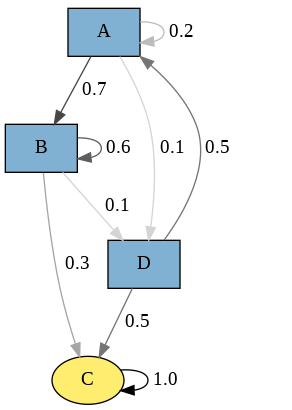

In [ ]:
m.plot_graph(mc)

## AULA 4 - Teoria de filas 1

In [ ]:
def prob_cheg(n,lambdac,t):
  return (math.exp(-lambdac*t)*(lambdac*t)**n)/math.factorial(n)
def desvio_p(lambdac,t):
  return math.sqrt(lambdac*t)
def media_p(lambdac,t):
  return lambdac*t
def prob_entre(lambdac,ti,tf):
  return math.exp(-ti*lambdac) - math.exp(-tf*lambdac)

Probabilidade de chegada em um intervalo de tempo = Distribuição de Poisson


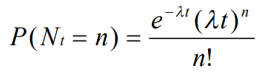

In [ ]:
# n = numero de chegadas/pedidos
n = 0
# lambdac = taxa media de chegadas
lambdac = 2.4
# t = tamanho do intervalo de tempo
t = 1
print(prob_cheg(n,lambdac,t))
print(1-prob_cheg(n,lambdac,t))

0.09071795328941251
0.9092820467105875


Desvio padrão da distribuição de Poisson


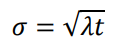

In [ ]:
# lambdac = taxa media de chegadas
lambdac = 30
# t = tamanho do intervalo de tempo
t = 4
print(desvio_p(lambdac,t))

10.954451150103322


Média da distribuição de Poisson

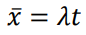


In [ ]:
# lambdac = taxa media de chegadas
lambdac = 30
# t = tamanho do intervalo de tempo
t = 4
print(media_p(lambdac,t))

120


Probabilidade de que o tempo entre dois pedidos esteja entre um 
intervalo de tempo

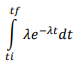

In [ ]:
# ti = tempo inicial
ti = 1
# tf = tempo final
tf = 3
#IMPORTANTE: lambdac deve ter a mesma unidade de medida do intervalo de tempo
lambdac = 0.5
print(prob_entre(lambdac,ti,tf))

0.38340049956420363


## AULA 5 - Teoria de filas 2

In [ ]:
def ro(lambdac,mi):
  return lambdac/mi
def pij(j,lambdac,mi):
  return (ro(lambdac,mi)**j)*(1-ro(lambdac,mi))
def L(lambdac,mi):
  return lambdac/(mi-lambdac)
def Lq(lamdbac,mi):
  return (ro(lambdac,mi)**2)/(1-ro(lambdac,mi))
def Ls(lambdac,mi):
  return ro(lambdac,mi)
def W(lambdac,mi):
  return 1/(mi-lambdac)
def Wq(lambdca,mi):
  return Lq(ro(lambdac,mi),mi)/lambdac
def Ws(lambdac,mi):
  return Ls(ro(lambdac,mi),mi)/lambdac
def med_atend(lambdac,mi):
  return ro(lambdac,mi)*mi

Modelo de fila M/M/1/GD/∞/∞

In [ ]:
# lambdac = taxa de chegada
lambdac = 2.4
# mi = taxa de saida/atendimento
mi = 3
# j = numero de clientes no sistema
j = 0
print(f'p (intensidade de trafego): {ro(lambdac,mi)}')
print(f'pij (probabilidade de ter {j} clientes no sistema): {pij(j,lambdac,mi)}')
print(f'L (numero medio de clientes no sistema): {L(lambdac,mi)}')
print(f'Lq (numero medio de clientes na fila): {Lq(lambdac,mi)}')
print(f'Ls (numero medio esperado de clientes em atendimento): {Ls(lambdac,mi)}')
print(f'W (tempo medio gasto pelo cliente no sistema): {W(lambdac,mi)} h ou {W(lambdac,mi)*60} min')
print(f'Wq (tempo medio gasto pelo cliente na fila): {Wq(lambdac,mi)} h ou {Wq(lambdac,mi)*60} min')
print(f'Ws (tempo medio gasto pelo cliente em servico): {Ws(lambdac,mi)} h ou {Ws(lambdac,mi)*60} min')
print(f'Media atendimentos: {med_atend(lambdac,mi)}')

p (intensidade de trafego): 0.7999999999999999
pij (probabilidade de ter 0 clientes no sistema): 0.20000000000000007
L (numero medio de clientes no sistema): 3.999999999999999
Lq (numero medio de clientes na fila): 3.1999999999999984
Ls (numero medio esperado de clientes em atendimento): 0.7999999999999999
W (tempo medio gasto pelo cliente no sistema): 1.6666666666666665 h ou 99.99999999999999 min
Wq (tempo medio gasto pelo cliente na fila): 1.3333333333333328 h ou 79.99999999999997 min
Ws (tempo medio gasto pelo cliente em servico): 0.11111111111111112 h ou 6.666666666666667 min
Media atendimentos: 2.4


In [ ]:
def ro(lambdac,mi):
  return lambdac/mi
def pi0_c(lambdac,mi,c):
  return (1-ro(lambdac,mi))/(1-ro(lambdac,mi)**(c+1))
def pij_c(j,lambdac,mi,c):
  return (ro(lambdac,mi)**j)*pi0_c(lambdac,mi,c)
def L_c(lambdac,mi,c):
  return ro(lambdac,mi)*(1-(c+1)*ro(lambdac,mi)**c+c*ro(lambdac,mi)**(c+1))/((1-ro(lambdac,mi)**(c+1))*(1-ro(lambdac,mi)))
def Ls_c(lambdac,mi,c):
  return 1-pi0_c(lambdac,mi,c)
def Lq_c(lambdac,mi,c):
  return L_c(lambdac,mi,c) - Ls_c(lambdac,mi,c)
def W_c(lambdac,mi,c):
  return L_c(lambdac,mi,c)/(lambdac*(1-pij_c(c,lambdac,mi,c)))
def Wq_c(lambdac,mi,c):
  return Lq_c(lambdac,mi,c)/(lambdac*(1-pij_c(c,lambdac,mi,c)))
def media_cheg(lambdac,mi,c):
  return lambdac*(1-pij_c(c,lambdac,mi,c))

Modelo de Fila M/M/1/GD/c/∞

In [ ]:
# lambdac = taxa de chegada
lambdac = 40
# mi = taxa de saida/atendimento
mi = 15
# j = numero de clientes no sistema
j = 4
# c = numero maximo possivel de clientes no sistema
c = 4

print(f'p (intensidade de trafego): {ro(lambdac,mi)}')
print(f'pij (probabilidade de ter {j} clientes no sistema): {pij_c(j,lambdac,mi,c)}')
print(f'L (numero medio de clientes no sistema): {L_c(lambdac,mi,c)}')
print(f'Lq (numero medio de clientes na fila): {Lq_c(lambdac,mi,c)}')
print(f'Ls (numero medio esperado de clientes em atendimento): {Ls_c(lambdac,mi,c)}')
print(f'W (tempo medio gasto pelo cliente no sistema): {W_c(lambdac,mi,c)} h ou {W_c(lambdac,mi,c)*60} min')
print(f'Wq (tempo medio gasto pelo cliente na fila): {Wq_c(lambdac,mi,c)} h ou {Wq_c(lambdac,mi,c)*60} min')
print(f'Media de chegadas: {media_cheg(lambdac,mi,c)}')
print(f'Probabilidade do servidor estar ocupado: {1-pi0_c(lambdac,mi,c)}')

p (intensidade de trafego): 2.6666666666666665
pij (probabilidade de ter 4 clientes no sistema): 0.6296694850115296
L (numero medio de clientes no sistema): 3.4373558800922357
Lq (numero medio de clientes na fila): 2.4498078401229813
Ls (numero medio esperado de clientes em atendimento): 0.9875480399692544
W (tempo medio gasto pelo cliente no sistema): 0.23204649232046487 h ou 13.922789539227892 min
Wq (tempo medio gasto pelo cliente na fila): 0.16537982565379822 h ou 9.922789539227892 min
Media de chegadas: 14.813220599538814
Probabilidade do servidor estar ocupado: 0.9875480399692544


## AULA 6 - Teoria de filas 3

In [ ]:
def ro_s(lambdac,mi,s):
  return lambdac/(s*mi)
def pi0_s(lambdac,mi,s):
  somatorio = 0
  for i in range(0,s):
    somatorio += ((s*ro_s(lambdac,mi,s))**i)/math.factorial(i)
  return 1/(somatorio+((s*ro_s(lambdac,mi,s))**s)/(math.factorial(s)*(1-ro_s(lambdac,mi,s))))
def pij_s(j,lambdac,mi,s):
  return (s*ro_s(lambdac,mi,s))**j*pi0_s(lambdac,mi,s)/(math.factorial(s)*s**(j-s))
def pjmaior_s(lambdac,mi,s):
  return (s*ro_s(lambdac,mi,s))**s*pi0_s(lambdac,mi,s)/(math.factorial(s)*(1-ro_s(lambdac,mi,s)))
def Lq_s(lambdac,mi,s):
  return (pjmaior_s(lambdac,mi,s)*ro_s(lambdac,mi,s))/(1-ro_s(lambdac,mi,s))
def Wq_s(lambdac,mi,s):
  return Lq_s(lambdac,mi,s)/lambdac
def L_s(lambdac,mi,s):
  return Lq_s(lambdac,mi,s) + lambdac/mi
def Ws_s(mi):
  return 1/mi
def Ls_s(lambdac,mi):
  return lambdac/mi
def W_s(lambdac,mi,s):
  return L_s(lambdac,mi,s)/lambdac
def prob_Wq(lambdac,mi,s,t):
  return pjmaior_s(lambdac,mi,s)*math.exp(-s*mi*(1-ro_s(lambdac,mi,s))*t)
def prob_W(lambdac,mi,s,t):
  parte1 = math.exp(-mi*t)
  parte21 = (1-math.exp(-mi*t*(s-1-s*ro_s(lambdac,mi,s))))/(s-1-ro_s(lambdac,mi,s))
  parte22 = 1+pjmaior_s(lambdac,mi,s)*parte21
  return parte1*parte22
def tempo_oci(j,lambdac,mi,s):
  aux = pi0_s(lambdac,mi,s)
  for i in range (1,j+1):
    aux+= pij_s(i,lambdac,mi,s)*(s-i)/s
  return aux

Modelo de Fila M/M/S/GD/∞/∞

In [ ]:
# lambdac = taxa de chegada
lambdac = 2.4
# mi = taxa de saida/atendimento
mi = 3
# j = numero de clientes no sistema
j = 2
# c = numero maximo possivel de clientes no sistema
s = 2
# t = tempo
t = 10

print(f'p (intensidade de trafego): {ro_s(lambdac,mi,s)}')
print(f'pi0 (probabilidade de ter 0 clientes no sistema): {pi0_s(lambdac,mi,s)}')
print(f'P(j>={s}) (probabilidade de todos os servidores estarem ocupados): {pjmaior_s(lambdac,mi,s)}')
print(f'pij (probabilidade de ter {j} clientes no sistema): {pij_s(j,lambdac,mi,s)}')
print(f'L (numero medio de clientes no sistema): {L_s(lambdac,mi,s)}')
print(f'Lq (numero medio de clientes na fila): {Lq_s(lambdac,mi,s)}')
print(f'Ls (numero medio esperado de clientes em atendimento): {Ls_s(lambdac,mi)}')
print(f'W (tempo medio gasto pelo cliente no sistema): {W_s(lambdac,mi,s)} h ou {W_s(lambdac,mi,s)*60} min')
print(f'Wq (tempo medio gasto pelo cliente na fila): {Wq_s(lambdac,mi,s)} h ou {Wq_s(lambdac,mi,s)*60} min')
print(f'Ws (tempo medio gasto pelo cliente em servico/atendimento): {Ws_s(mi)} h ou {Ws_s(mi)*60} min')
print(f'P(Wq>{t}): {prob_Wq(lambdac,mi,s,t)}')
print(f'P(W>{t}): {prob_W(lambdac,mi,s,t)}')
print(f'Fracao de tempo que {j} servidores estao vazios {tempo_oci(j,lambdac,mi,s)} ')

p (intensidade de trafego): 0.39999999999999997
pi0 (probabilidade de ter 0 clientes no sistema): 0.4285714285714286
P(j>=2) (probabilidade de todos os servidores estarem ocupados): 0.2285714285714285
pij (probabilidade de ter 2 clientes no sistema): 0.13714285714285712
L (numero medio de clientes no sistema): 0.9523809523809522
Lq (numero medio de clientes na fila): 0.1523809523809523
Ls (numero medio esperado de clientes em atendimento): 0.7999999999999999
W (tempo medio gasto pelo cliente no sistema): 0.39682539682539675 h ou 23.809523809523803 min
Wq (tempo medio gasto pelo cliente na fila): 0.06349206349206346 h ou 3.8095238095238075 min
Ws (tempo medio gasto pelo cliente em servico/atendimento): 0.3333333333333333 h ou 20.0 min
P(Wq>10): 5.3017664691281193e-17
P(W>10): 1.291359544142598e-13
Fracao de tempo que 2 servidores estao vazios 0.6000000000000001 


## AULA 7 - Teoria de filas 4

In [ ]:
def comb(x,y):
  return math.factorial(x)/(math.factorial(x-y)*math.factorial(y))
def ro(lambdac,mi):
  return lambdac/mi
def pi0_R(lambdac,mi,k,R):
  aux1 = 0
  aux2 = 0
  for i in range(1,R+1):
    aux1 += comb(k,i)*ro(lambdac,mi)**(i)
  for j in range(R+1,k+1):
    aux2 += comb(k,j)*ro(lambdac,mi)**(j)*math.factorial(j)/(math.factorial(R)*R**(j-R))
  return 1/(1+aux1+aux2)
def pij_R(lambdac,mi,k,j,R):
  if j<=R:
    pij = comb(k,j)*ro(lambdac,mi)**(j)
  else:
    pij = comb(k,j)*ro(lambdac,mi)**(j)*math.factorial(j)/(math.factorial(R)*R**(j-R))
  return pi0_R(lambdac,mi,k,R)*pij
def pij_Rpi0(lambdac,mi,k,j,R):
  if j<=R:
    pij = comb(k,j)*ro(lambdac,mi)**(j)
  else:
    pij = comb(k,j)*ro(lambdac,mi)**(j)*math.factorial(j)/(math.factorial(R)*R**(j-R))
  return pij
def L_R(lambdac,mi,k,R):
  somatorio = 0
  for j in range(0,k+1):
    somatorio += j*pij_R(lambdac,mi,k,j,R)
  return somatorio
def lambda_med(lambdac,mi,k,R):
  return lambdac*(k-L_R(lambdac,mi,k,R))
def W_R(lambdac,mi,k,R):
  return L_R(lambdac,mi,k,R)/lambda_med(lambdac,mi,k,R)
def Lq_R(lambdac,mi,k,R):
  somatorio = 0
  for j in range(R,k+1):
    somatorio += (j-R)*pij_R(lambdac,mi,k,j,R)
  return somatorio
def Wq_R(lambdac,mi,k,R):
  return Lq_R(lambdac,mi,k,R)/lambda_med(lambdac,mi,k,R)

Modelo de Fila M/M/R/GD/K/K

In [ ]:
# Calcular o numero de combinacoes
x = 5
y = 3
print(comb(x,y))

10.0


In [ ]:
# lambdac = taxa de chegada
lambdac = 60/45
# mi = taxa de saida/atendimento
mi = 7.5
# j = numero de clientes no sistema
j = 5
# R = numero de servidores em paralelo
R = 1
# k = numero maximo de clientes no sistema
k = 5
print(f'p (intensidade de trafego): {ro(lambdac,mi)}')
print(f'pi0 (probabilidade de ter 0 clientes no sistema): {pi0_R(lambdac,mi,k,R)}')
print(f'pij (probabilidade de ter {j} clientes no sistema): {pij_R(lambdac,mi,k,j,R)}')
print(f'pij_pi0 (probabilidade de ter {j} clientes no sistema): {pij_Rpi0(lambdac,mi,k,j,R)}*pi0')
print(f'L (numero medio de clientes no sistema): {L_R(lambdac,mi,k,R)}')
print(f'Lq (numero medio de clientes na fila): {Lq_R(lambdac,mi,k,R)}')
print(f'W (tempo medio gasto pelo cliente no sistema): {W_R(lambdac,mi,k,R)} h ou {W_R(lambdac,mi,k,R)*60} min')
print(f'Wq (tempo medio gasto pelo cliente na fila): {Wq_R(lambdac,mi,k,R)} h ou {Wq_R(lambdac,mi,k,R)*60} min')
print(f'lambda medio (taxa de chegada media): {lambda_med(lambdac,mi,k,R)}')
print(f'Numero de clientes em boas condicoes: {k-L_R(lambdac,mi,k,R)}')

p (intensidade de trafego): 0.17777777777777776
pi0 (probabilidade de ter 0 clientes no sistema): 0.3334132499750182
pij (probabilidade de ter 5 clientes no sistema): 0.007104793618976873
pij_pi0 (probabilidade de ter 5 clientes no sistema): 0.021309271960575103*pi0
L (numero medio de clientes no sistema): 1.250449531109477
Lq (numero medio de clientes na fila): 0.5838627810844951
W (tempo medio gasto pelo cliente no sistema): 0.25011988933425666 h ou 15.0071933600554 min
Wq (tempo medio gasto pelo cliente na fila): 0.11678655600092332 h ou 7.007193360055399 min
lambda medio (taxa de chegada media): 4.999400625187364
Numero de clientes em boas condicoes: 3.749550468890523
